# Домашнее задание 4.1

# 🥨👨🏻‍🍳🥐🥖

Тест с картинками оказался в итоге успешным, и теперь мы хотим усилить визуальный контент. Есть идея, что если мы сделаем не одну картинку, а еще и добавим видео производства наших изделий, то пользователь будет принимать решение о покупке охотнее и быстрее, и конверсия в заказ вырастет. 

__Продакт вернул нам такой дизайн эксперимента:__

*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится


## Что нужно сделать?

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?

1. Выбрать окно конверсии
2. Исследовать распределение пользователей по группам по основным сегментам
3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат
4. Вычислить мощность теста
5. Использовать бутстрап для оценки влияния теста на средний чек
6. Сделать вывод по результатам проведенного теста 

## Задание 1. Выбери окно конверсии, используя исторические данные 

**1. Прочитай файл investigate_window.csv.**
   - Запиши даннные в переменную `historical_data`
    
   - Отправь безымянную колонку с нумерацией в индекс с помощью аргумента функции `read_csv()`.
   
   - Проверь, какой тип данных в каждой колонке, и переведи столбцы с датами в формат даты. 

In [1]:
import pandas as pd

In [2]:
historical_data = pd.read_csv('investigate_window.csv',parse_dates = [2,3], index_col = 0)
#импортирую данные и перевожу в формат даты нужные столбцы

In [3]:
historical_data.head()

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [4]:
# Проверь, выводятся ли даты в формате datetime. Если нет — исправь это. 

historical_data.dtypes

user_id                              int64
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at     datetime64[ns, UTC]
time_to_order                      float64
dtype: object

**2. Вычисли 95, 90 и 85 перцентили для наших данных с помощью колонки time_to_order.**
   - Импортируй библиотеку `NumPy` и используй функцию перцентиля из нее.
   - Какой перцентиль соответствует недельному окну конверсии? 
   - Запиши это значение в отдельную переменную `perc_X`, где Х — это выбранный тобой процент, а значение переменной – значение перцентиля, т. е. количество дней, которое избирается в качестве окна конверсии. 
   - Округли значение до 1 знака после запятой.

In [5]:
import numpy as np

In [6]:
np.percentile(historical_data['time_to_order'], 95) # 95 перцентиль - значение для всей выборки

7.117476851851854

In [7]:
np.percentile(historical_data['time_to_order'], 90)

2.864949845679016

In [8]:
np.percentile(historical_data['time_to_order'], 85)

1.9903886959876524

In [9]:
perc_X=round(np.percentile(historical_data['time_to_order'], 95),1)

**3. Построй гистограмму распределения времени между первым заходом на сайт и покупкой.** 
   - Передай функции графика в аргумент данные о времени конверсии
   - Назови график и оси
   - Вертикальной пунктирной линией отметь значение выбранного тобой перцентиля. 
   - Выведи значение перцентиля в легенду. 
*Можешь использовать `seaborn` или `matplotlib`, как тебе удобнее.*

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


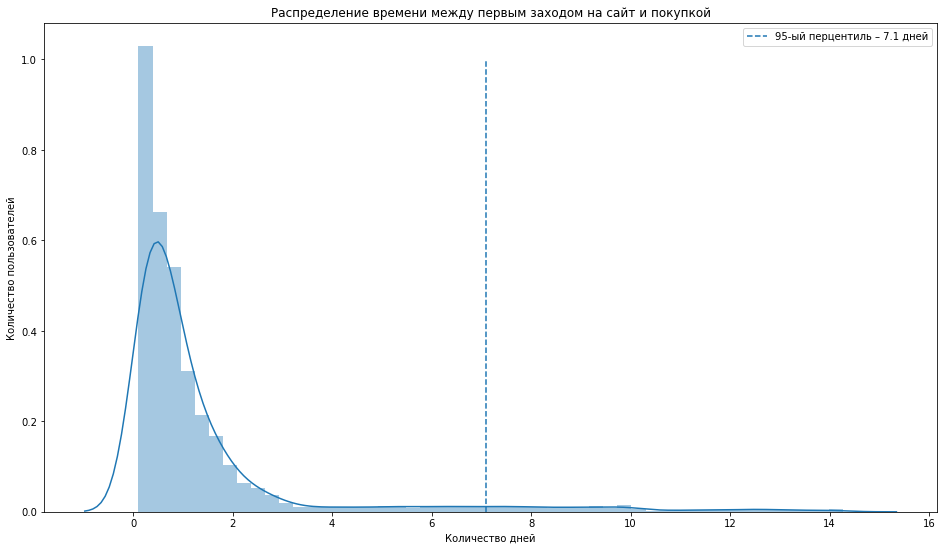

In [11]:
plt.figure(figsize=(16,9))
sns.distplot(historical_data['time_to_order'])
plt.vlines(perc_X, ymin = 0, ymax = 1.0, linestyles = 'dashed', label = f'95-ый перцентиль – {perc_X} дней')
plt.title('Распределение времени между первым заходом на сайт и покупкой')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

## Задание 2. Исследуй распределение пользователей по группам по основным сегментам 

**1. Прочитай файл bakery_ab_test.csv.**
   - Проверь, импортированы ли нужные тебе библиотеки.
   - Запиши данные в переменную `data`. 
   - Назначь индекс аналогично первому заданию.

In [12]:
data = pd.read_csv('bakery_ab_test.csv', index_col = 0)
data

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...
152995,2604636,test,NaN,regions,target_direct,0,pc
152996,2604653,control,5236.818309,regions,organic,1,mobile
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


In [13]:
data.dtypes

user_id                  int64
test_group              object
purchase_amount        float64
geo_group               object
acquisition_channel     object
within_window            int64
platform                object
dtype: object

**2. Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**
   - Аргументами функции должны быть данные теста, колонки с сегментами (маркетинг, гео и платформа), тест-фактор.
   - Для каждого сегмента в функции агрегируй данные, посчитав по для каждой группы и сегмента количество пользователей.
   - Сбрость индекс.
   - Добавь в функцию построение столбиковой диаграммы (bar chart).

In [14]:
metrics = data.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum'})
metrics['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)
metrics

,test_group,user_id,within_window,conversion
0,control,75210,22998,30.58
1,test,75273,24427,32.45


In [15]:
import seaborn as sns

In [16]:
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'user_id', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 4, # задаем размер графика 
                    aspect = 1.5) # задаем ширину столбца

**3. Вызови функцию и посмотри на графики. Какой вывод о качестве сплитования ты можешь сделать?**
    — Передай списком столбцы, в которых обозначены сегменты пользователей, и отдельно столбец с тест-фактором.

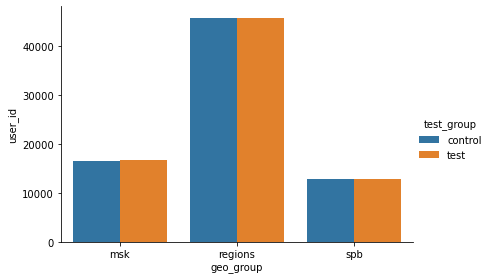

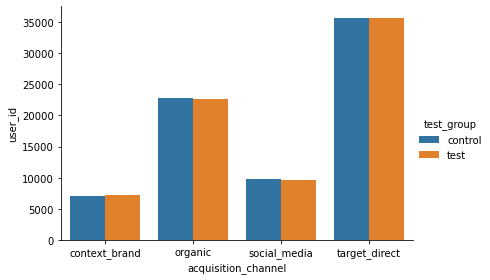

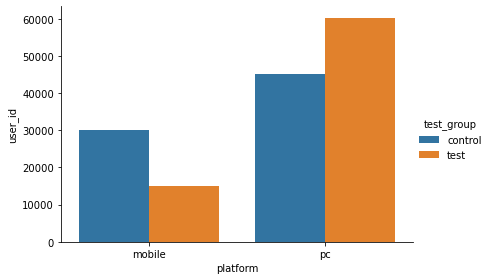

In [17]:
plot_segments_distribution(data, #датафрейм
                           ["geo_group", "acquisition_channel","platform"], #сегменты
                           "test_group") #тест-фактор

## Задание 3. Используй критерий Хи-квадрат для конверсии


В прошлом задании ты, скорее всего, столкнулся с неравномерным распределением пользователей. Раньше мы просто перезапускали тест, чтобы собрать данные, но сейчас тест уже завершен, так что нам нужно анализировать те данные, которые есть. Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**Создай для каждой из 3 групп теста отдельную таблицу с метриками**
   - общее количество пользователей 
   - количество покупок в окне конверсии
   - средняя сумма покупки 
   - конверсия (количество покупок в окне конверсии / общее количество пользователей или среднее по полю `within_window`)
    
*Для фильтрации нужных пользователей можешь использовать* `loc[ ]`


In [51]:
data_all=data
data_all

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...
152995,2604636,test,NaN,regions,target_direct,0,pc
152996,2604653,control,5236.818309,regions,organic,1,mobile
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


In [53]:
data_pc=data.loc[data['platform']=='pc']
data_pc

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
6,3823,test,455.185867,regions,social_media,1,pc
...,...,...,...,...,...,...,...
152994,2604619,test,NaN,regions,target_direct,0,pc
152995,2604636,test,NaN,regions,target_direct,0,pc
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


In [55]:
data_mobile = data.loc[data['platform']=='mobile']
data_mobile

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
3,3772,test,NaN,regions,context_brand,0,mobile
16,3993,control,128.730930,msk,social_media,1,mobile
22,4095,control,NaN,msk,target_direct,0,mobile
27,4180,control,NaN,regions,social_media,0,mobile
30,4231,test,NaN,regions,target_direct,0,mobile
...,...,...,...,...,...,...,...
152974,2604279,test,NaN,regions,context_brand,0,mobile
152979,2604364,control,6609.158913,regions,target_direct,1,mobile
152982,2604415,test,NaN,regions,organic,0,mobile
152986,2604483,test,NaN,regions,target_direct,0,mobile


In [52]:
metrics1=data_all.groupby('test_group', as_index= False).agg({'user_id': 'count', 'purchase_amount': 'mean','within_window': 'sum'})
metrics1['conversion'] = round(metrics1['within_window']/metrics1['user_id']*100, 2)
metrics1

,test_group,user_id,purchase_amount,within_window,conversion
0,control,75210,5170.864335,22998,30.58
1,test,75273,5394.771589,24427,32.45


In [56]:
metrics_mobile=data_mobile.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum','purchase_amount': 'mean'})
metrics_mobile['conversion'] = round(metrics_mobile['within_window']/metrics_mobile['user_id']*100, 2)
metrics_mobile

,test_group,user_id,within_window,purchase_amount,conversion
0,control,30098,9266,5127.505438,30.79
1,test,14956,4768,5369.075812,31.88


In [54]:
metrics_pc=data_pc.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum','purchase_amount': 'mean'})
metrics_pc['conversion'] = round(metrics_pc['within_window']/metrics_pc['user_id']*100, 2)
metrics_pc

,test_group,user_id,within_window,purchase_amount,conversion
0,control,45112,13732,5200.121803,30.44
1,test,60317,19659,5401.003720,32.59


In [24]:
metrics = data.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum'})
metrics['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)

**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

   - Импортируй библиотеку `statsmodels` и используй функцию `proportions_chisquare` из нее
   - Результат работы функции `proportions_chisquare` присвой трем переменным для каждой группы


In [110]:
import statsmodels.stats.proportion as proportion

In [111]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics1['within_window'], metrics1['user_id'])

In [112]:
chi2stat, pval, table

(61.137841436908104,
 5.321539863368111e-15,
 (array([[22998, 52212],
         [24427, 50846]], dtype=int64),
  array([[23702.57271585, 51507.42728415],
         [23722.42728415, 51550.57271585]])))

In [113]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['within_window'], metrics_pc['user_id'])
chi2stat_pc, pval_pc, table_pc

(55.28301795095328,
 1.0436637877855105e-13,
 (array([[13732, 31380],
         [19659, 40658]], dtype=int64),
  array([[14287.67029944, 30824.32970056],
         [19103.32970056, 41213.67029944]])))

In [114]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['within_window'], metrics_mobile['user_id'])
chi2stat_mobile, pval_mobile, table_mobile

(5.576527147023639,
 0.018202784051985058,
 (array([[ 9266, 20832],
         [ 4768, 10188]], dtype=int64),
  array([[ 9375.31255826, 20722.68744174],
         [ 4658.68744174, 10297.31255826]])))

**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [130]:
alpha = 0.005

In [131]:
print(pval < alpha)

True


In [132]:
print(pval_pc < alpha)

True


In [133]:
print(pval_mobile < alpha)

False


In [134]:
print(pval)
print(pval_pc)
print(pval_mobile)

5.321539863368111e-15
1.0436637877855105e-13
0.018202784051985058


**3. Оставь комментарий, какой вывод о наличии статистически значимой в каждой группе разницы можно сделать? Что делаем с нулевой гипотезой?**

In [ ]:
все три группы показали p-value меньше порога ошибки первого рода, значит результат можно считать статзначимым, нулевую гипотезу отклоняем

## Задание 4. Вычисли мощность теста

1. Импортируй объект `stats.power` из библиотеки `statsmodels`
2. Присвой функцию `GofChisquarePower()` из этой библиотеки в переменную `chipower` 
3. Реализуй функцию для подсчета `effect_size`

In [36]:
import statsmodels.stats.power as smp

In [37]:
chipower = smp.GofChisquarePower()

`effect_size` — это та самая наблюдаемая разница между двумя вариантами. Вычисляется следующим образом: 

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — тестовой

In [38]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

4. Запиши значения конверсии в тестовой `conversion_test` и контрольной `conversion_control` группы в разные переменные
    - переведи серию в массив с помощью `.values[ ]`
    - раздели значения на 100, чтобы получить значения, а не %
    
    
5. Создай переменную nobs для количества наблюдений и запиши в нее значение меньшей группы

In [39]:
conversion_control= metrics1['conversion'].values[0]/100 
conversion_test = metrics1['conversion'].values[1]/100
nobs= min(metrics1['user_id'])

In [41]:
conversion_control_mobile = metrics_mobile['conversion'].values[0]/100 
conversion_test_mobile = metrics_mobile['conversion'].values[1]/100
nobs_mobile =  min(metrics_mobile['user_id'])

In [42]:
conversion_control_pc = metrics_pc['conversion'].values[0]/100 
conversion_test_pc = metrics_pc['conversion'].values[1]/100
nobs_pc = min(metrics_pc['user_id'])

**6. Вызови функцию .solve_power и передай ей в аргументы** 
    - effect_size
    - количество наблюдений меньшей группы
    - значение p-value
    - мощности присвой значение None
    
**7. Сделай анализ мощности для каждого сегмента, для которого делали тест хи-квадрат.**

Оставь комментарий, как ты оцениваешь мощность этого теста? Можно ли на основе таких показателей делать выводы?


In [44]:
power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control, conversion_test), # разница коэффициентов конверсии
                                               nobs = nobs, # размер выборки
                                               alpha = pval, # значение ошибки первого рода на наших данных
                                               power = None) # функция вернет значение, указаное как None
power

0.9271367916086642

In [46]:
mobile_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), # разница коэффициентов конверсии
                                               nobs = nobs_mobile, # размер выборки
                                               alpha = pval_mobile, # значение ошибки первого рода на наших данных
                                               power = None) # функция вернет значение, указаное как None
mobile_power

0.51629109023244

In [47]:
pc_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_pc, conversion_test_pc), # разница коэффициентов конверсии
                                               nobs = nobs_pc, # размер выборки
                                               alpha = pval_pc, # значение ошибки первого рода на наших данных
                                               power = None) # функция вернет значение, указаное как None
pc_power

0.79997711974453

In [ ]:
Из полученных данных видно, что мощность общей группы более 80 , а группы пользователей пк очень близка к 80, 
значит в этих группах с большой вероятностью мы увидим статистически значимые отличия. В группе пользователей
телефонов мощность составила 51, значит в этой группе с вероятностью 49 % мы не увидимм статистически значимые отличия.

## Задание 5. Воспользуйся бутстрапом для оценки влияния теста на средний чек

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат. Какие выводы можно сделать?**
   - загрузи нужные модули из библиотеки `bootstrapped`
   - для сегментов, которые мы анализируем отдельно, создай переменную со значением среднего чека
   - чтобы убрать строки без покупок, используй `dropna()` и `.values`, чтобы перевести данные в формат массива

In [49]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np

In [57]:
data_all

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...
152995,2604636,test,NaN,regions,target_direct,0,pc
152996,2604653,control,5236.818309,regions,organic,1,mobile
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


In [66]:
test = data_all[data_all['test_group'] == 'test']['purchase_amount'].dropna().values
control = data_all[data_all['test_group'] == 'control']['purchase_amount'].dropna().values

test_pc = data_pc[data_pc['test_group'] == 'test']['purchase_amount'].dropna().values
control_pc = data_pc[data_pc['test_group'] == 'control']['purchase_amount'].dropna().values

test_mobile = data_mobile[data_mobile['test_group'] == 'test']['purchase_amount'].dropna().values
control_mobile = data_mobile[data_mobile['test_group'] == 'control']['purchase_amount'].dropna().values

In [68]:
print(test)
print(control)

print(test_pc)
print(control_pc)

print(test_mobile)
print(control_mobile)

[  306.63951103   455.18586714   308.47387769 ...  3793.16937644
 15918.14289112   304.87677871]
[4912.50769047  128.7309298  5561.0190975  ... 5139.97143966 5236.81830912
  101.78303218]
[  306.63951103   455.18586714   308.47387769 ...  3793.16937644
 15918.14289112   304.87677871]
[4912.50769047 5561.0190975   240.52248096 ... 2055.15391568 5139.97143966
  101.78303218]
[5307.14818521 6152.77620228  334.49969485 ... 2130.46859063 5810.93555371
 5967.34716398]
[  128.7309298  10370.80519184   134.66595342 ...  6998.08006284
  6609.15891273  5236.81830912]


**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**
   - `test = `
   - `ctrl = `
   - `stat_func = bs_stats.mean`
   - `compare_func = bs_compare.difference`
   - `return_distribution = True`

In [75]:
boot = bs.bootstrap_ab(test = test, ctrl = control
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)
boot

array([276.62035893, 185.03055808, 254.78313448, ..., 188.06266935,
       259.67302506, 218.81192645])

In [76]:
boot_pc = bs.bootstrap_ab(test = test_pc, ctrl = control_pc
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)
boot_pc

array([225.5703073 , 251.63443053, 165.33222407, ..., 215.98373077,
       293.20297784, 163.14529606])

In [77]:
boot_mobile = bs.bootstrap_ab(test = test_mobile, ctrl = control_mobile
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)
boot_mobile

array([251.49024871, 181.25526214, 318.14993317, ..., 203.90292315,
       294.41342215, 257.92178392])

**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [78]:
borders = np.percentile(boot, [2.5, 97.5]) # считаем перцентили
borders_pc = np.percentile(boot_pc, [2.5, 97.5]) 
borders_mobile = np.percentile(boot_mobile, [2.5, 97.5]) 

**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**

   - Построй гистограмму распределения значений среднего чека.
   - Выведи границы доверительного интервала линиями.
   - Выведи ноль красной линией.
   - Оставь комментарий, есть ли статистически значимое изменение по среднему чеку в каждом сегменте.
   

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


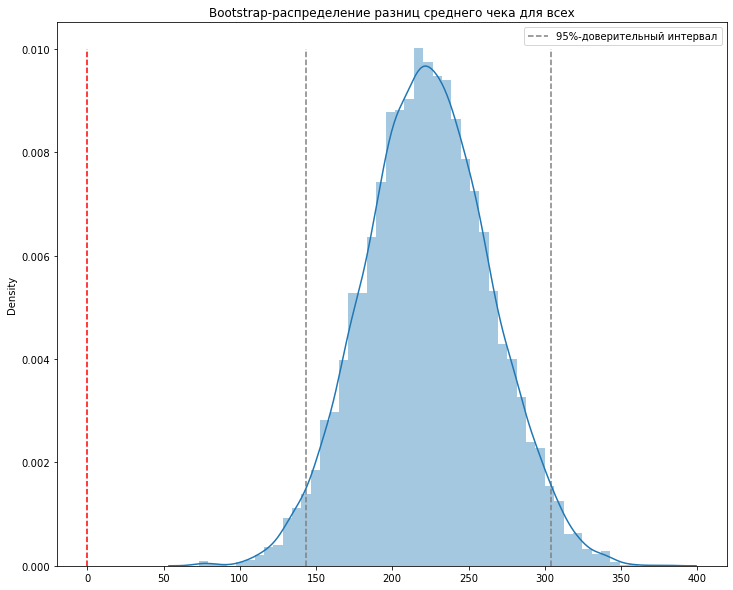

In [98]:
sns.distplot(boot) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека для всех')
plt.rcParams["figure.figsize"] = (12, 10)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.01, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.01, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


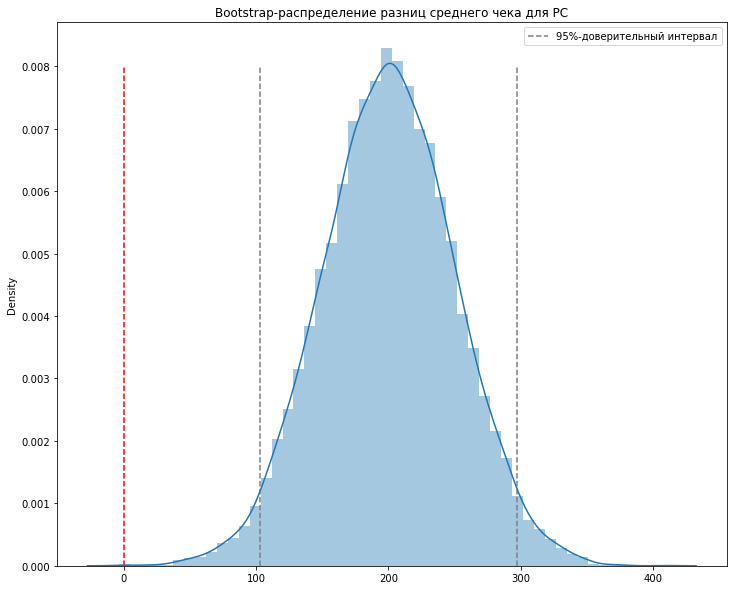

In [102]:
sns.distplot(boot_pc) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека для PC')
plt.rcParams["figure.figsize"] = (12, 10)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.008, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders_pc, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.008, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


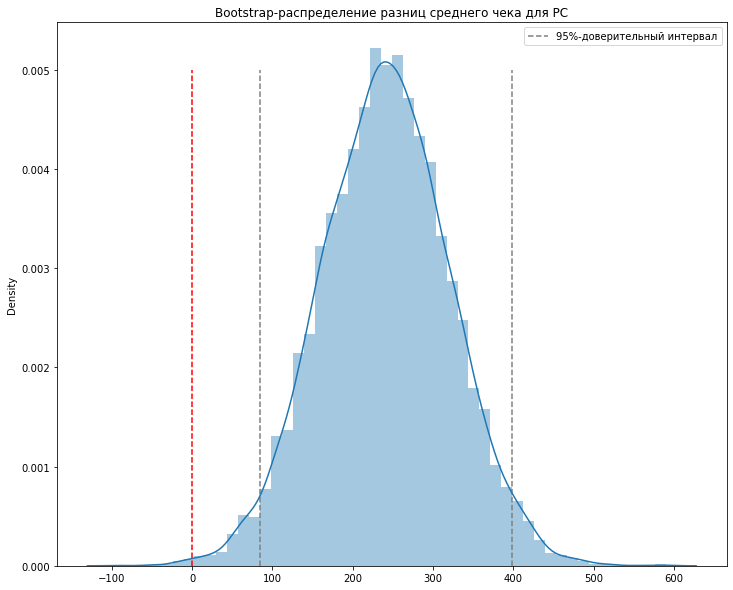

In [103]:
sns.distplot(boot_mobile) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека для PC')
plt.rcParams["figure.figsize"] = (12, 10)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.005, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders_mobile, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.005, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

## Задание 6. Сделай вывод по результатам проведенного теста (заданий 2–5)

Нужно ли внедрять изменение каталога? Почему?

# Обобщим результаты исследований

Общая группа конверсия +1.87%,
             Pvalue < 0.05,
             Мощность -0,92,
             Бутстрап - разница значима.
                      
 Группа ПК конверсия +2.15%,
           Pvalue < 0.05,
           Мощность 0.51,
           Бутстрап - разница незначима.
           
 Группа mobile конверсия +1.09%,
           Pvalue < 0.05,
           Мощность 0.799,
           Бутстрап - разница незначима.
           
Общая группа показала, что с большой долей вероятности конверсия должна вырасти на 1,8%, но при это нужно учитывать, что распределение пользователей ПК и телефонов на контрольные и тестовые группы было неравным, так у пользователей телефонов контрольная группа была в 2 раза больше тестовой, а у пк пользователей тестовая группа на 25% больше контрольной поэтому я 
бы рекомендовал уравнять эти группы и еще раз провести исследования и если они покажут такие же результаты, то можно будет применить изменения.
           

                                                    

# 🎉🎉🎉 Поздравляем, ты великолепен! 